## Importing Libraries and data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [2]:
data = pd.read_csv('framingham.csv')
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [4]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data.education.unique()

array([ 4.,  2.,  1.,  3., nan])

<AxesSubplot:xlabel='education', ylabel='Count'>

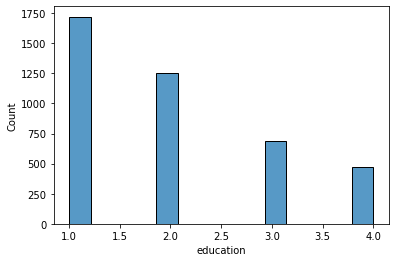

In [6]:
sns.histplot(data['education'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

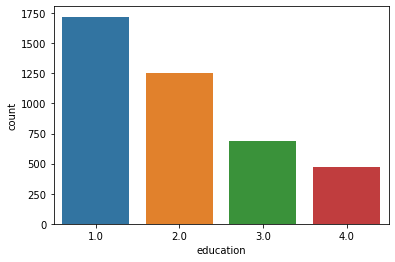

In [7]:
sns.countplot(data['education'])

In [8]:
print(sorted(data['totChol'].unique()))

[107.0, 170.0, 175.0, 178.0, 179.0, 180.0, 183.0, 185.0, 189.0, 190.0, 194.0, 195.0, 197.0, 200.0, 202.0, 205.0, 208.0, 209.0, 210.0, 212.0, 213.0, 214.0, 215.0, 216.0, 220.0, 221.0, 223.0, 225.0, 226.0, 228.0, 232.0, 233.0, 234.0, 235.0, 237.0, 240.0, 243.0, 245.0, 247.0, 248.0, 250.0, 252.0, 254.0, 255.0, 257.0, 258.0, 260.0, 261.0, 266.0, 267.0, 270.0, 272.0, 274.0, 285.0, 291.0, 294.0, 295.0, 300.0, 302.0, 311.0, 313.0, 332.0, nan, 113.0, 119.0, 124.0, 126.0, 129.0, 133.0, 135.0, 137.0, 140.0, 143.0, 144.0, 145.0, 148.0, 149.0, 150.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 171.0, 172.0, 173.0, 174.0, 176.0, 177.0, 181.0, 182.0, 184.0, 186.0, 187.0, 188.0, 191.0, 192.0, 193.0, 196.0, 198.0, 199.0, 201.0, 203.0, 204.0, 206.0, 207.0, 211.0, 217.0, 218.0, 219.0, 222.0, 224.0, 227.0, 229.0, 230.0, 231.0, 236.0, 238.0, 239.0, 241.0, 242.0, 244.0, 246.0, 249.0, 251.0, 253.0, 256.0, 259.0, 262.0, 263.0, 

In [9]:
data['totChol'].mean()

236.72158548233045

In [10]:
data['totChol'].median()

234.0

In [11]:
#Substituting the null values in total cholestrol column
data['totChol'].fillna(value = data['totChol'].median() , inplace=True)

In [12]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

In [13]:
data['heartRate'].mean()

75.87892376681614

In [14]:
data['heartRate'].median()

75.0

In [15]:
#substituting the null values in heart rate column with median
data['heartRate'].fillna(value=data['heartRate'].median() , inplace=True)

In [16]:
print(sorted(data['glucose'].unique()))

[40.0, 45.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 102.0, 103.0, nan, 43.0, 44.0, 47.0, 48.0, 50.0, 52.0, 53.0, 90.0, 100.0, 101.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 129.0, 130.0, 131.0, 132.0, 135.0, 136.0, 137.0, 140.0, 142.0, 143.0, 144.0, 145.0, 147.0, 148.0, 150.0, 155.0, 156.0, 160.0, 163.0, 166.0, 167.0, 170.0, 172.0, 173.0, 177.0, 183.0, 186.0, 191.0, 193.0, 202.0, 205.0, 206.0, 207.0, 210.0, 215.0, 216.0, 223.0, 225.0, 235.0, 244.0, 248.0, 250.0, 254.0, 255.0, 256.0, 260.0, 268.0, 270.0, 274.0, 292.0, 294.0, 297.0, 320.0, 325.0, 332.0, 348.0, 368.0, 370.0, 386.0, 394.0]


In [17]:
data['glucose'].mean()

81.96675324675324

In [18]:
data['glucose'].median()

78.0

In [19]:
#Filling the null value in glucose value with median 
data['glucose'].fillna(value= data['glucose'].median() , inplace=True)

In [20]:
data['BMI'].median()

25.4

In [21]:
#Filling the null value in BMI value with median 
data['BMI'].fillna(value= data['BMI'].median() , inplace=True)

In [22]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [23]:
#Dropping the null values
data.dropna(axis=0 , inplace=True)

In [24]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
data.shape

(4053, 16)

##### >> Around 200 rows have been dropped

## Visualization 

Text(0.5, 1.0, 'Stacked bar chat of sex(male) vs TenyearCHD')

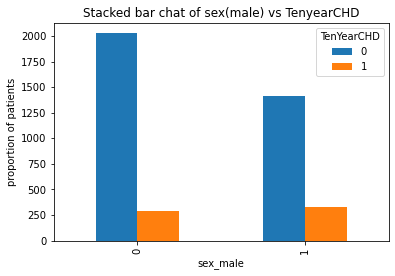

In [26]:
pd.crosstab(data['male'] , data['TenYearCHD']).plot(kind = 'bar')
plt.xlabel('sex_male')
plt.ylabel("proportion of patients")
plt.title("Stacked bar chat of sex(male) vs TenyearCHD")

##### >>>>>sex does seem as a strong predictor for the outcome variable

Text(0.5, 1.0, 'Stacked bar chat of education vs TenyearCHD')

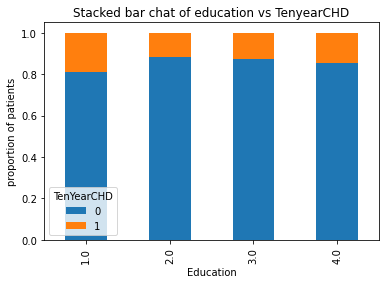

In [27]:
table = pd.crosstab(data['education'] , data['TenYearCHD'])
table.div(table.sum(1).astype(float), axis = 0).plot(kind= 'bar' , stacked = True)
plt.xlabel('Education')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of education vs TenyearCHD')

##### >> education does not seem as a strong predictor for the outcome variable

Text(0.5, 1.0, 'Stacked bar chat of smokers vs TenyearCHD')

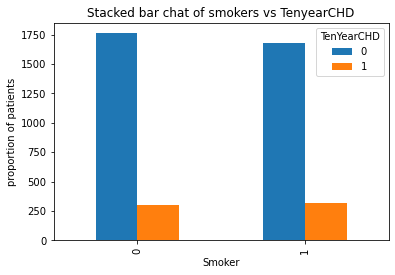

In [28]:
pd.crosstab(data['currentSmoker'] , data['TenYearCHD']).plot(kind='bar')
plt.xlabel('Smoker')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of smokers vs TenyearCHD')

##### >> smoker does not seem as a strong predictor for the outcome variable

Text(0.5, 1.0, 'Stacked bar chat of patients who take BP meds vs TenyearCHD')

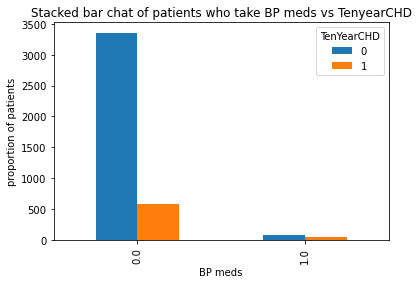

In [29]:
pd.crosstab(data['BPMeds'] , data['TenYearCHD']).plot(kind='bar')
plt.xlabel('BP meds')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of patients who take BP meds vs TenyearCHD')

##### >> BP meds does seem as a strong predictor for the outcome variable

Text(0.5, 1.0, 'Stacked bar chat of diabetes patients vs TenyearCHD')

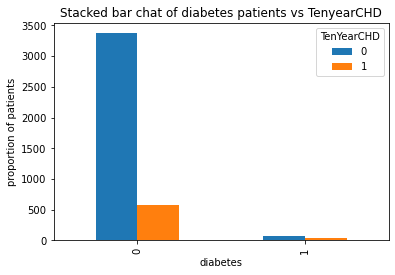

In [30]:
pd.crosstab(data['diabetes'] , data['TenYearCHD']).plot(kind='bar')
plt.xlabel('diabetes')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of diabetes patients vs TenyearCHD')

##### >>  Diabetesdoes seem as a strong predictor for the outcome variabl

Text(0.5, 1.0, 'Stacked bar chat of patients have had stroke meds vs TenyearCHD')

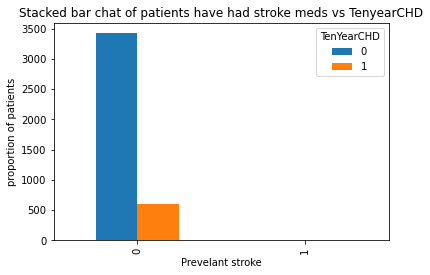

In [31]:
pd.crosstab(data['prevalentStroke'] , data['TenYearCHD']).plot(kind='bar')
plt.xlabel('Prevelant stroke')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of patients have had stroke meds vs TenyearCHD')

##### >> prevelent stroke does seem as a strong predictor for the outcome variable

Text(0.5, 1.0, 'Stacked bar chat of patients with prevelent hyp vs TenyearCHD')

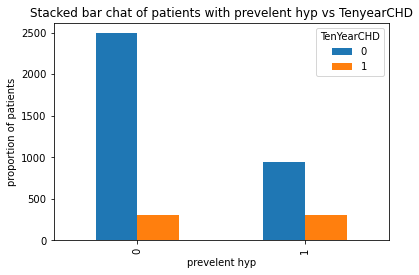

In [32]:
pd.crosstab(data['prevalentHyp'] , data['TenYearCHD']).plot(kind='bar')
plt.xlabel('prevelent hyp')
plt.ylabel('proportion of patients')
plt.title('Stacked bar chat of patients with prevelent hyp vs TenyearCHD')

##### >>  prevent hyp does not seem as a strong predictor for the outcome variable

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

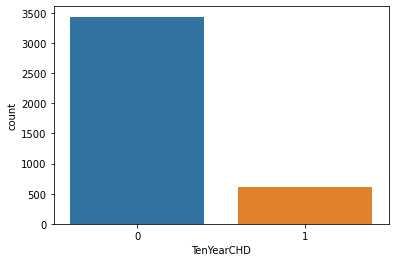

In [33]:
sns.countplot(data['TenYearCHD'])

### Visualization for continuous data

In [34]:
data.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

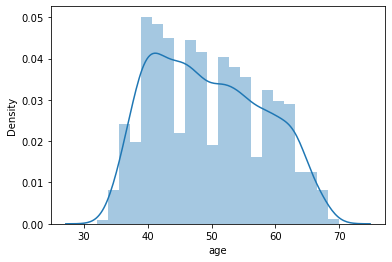

In [35]:
sns.distplot(data['age'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='TenYearCHD'>

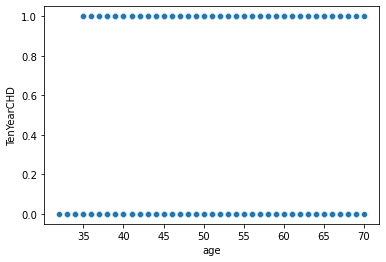

In [36]:
sns.scatterplot(data['age'] , data['TenYearCHD'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cigsPerDay', ylabel='TenYearCHD'>

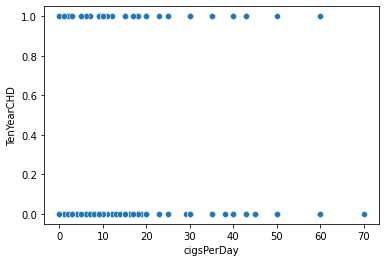

In [37]:
sns.scatterplot(data['cigsPerDay'] , data['TenYearCHD'])

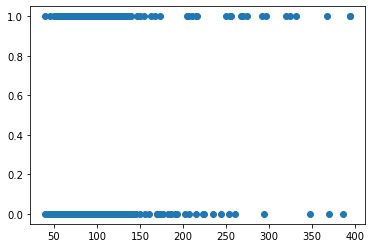

In [38]:
plt.scatter(data['glucose'], data['TenYearCHD'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heartRate', ylabel='TenYearCHD'>

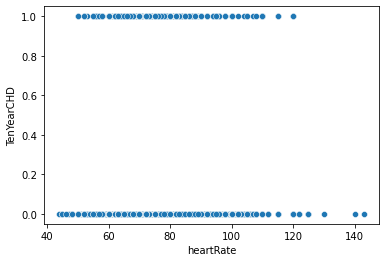

In [39]:
sns.scatterplot(data['heartRate'] , data['TenYearCHD'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI', ylabel='TenYearCHD'>

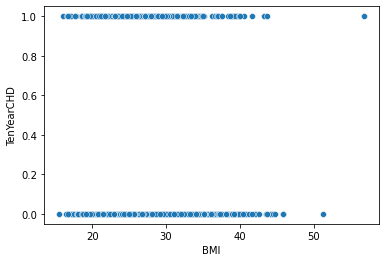

In [40]:
sns.scatterplot(data['BMI'] , data['TenYearCHD'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diaBP', ylabel='TenYearCHD'>

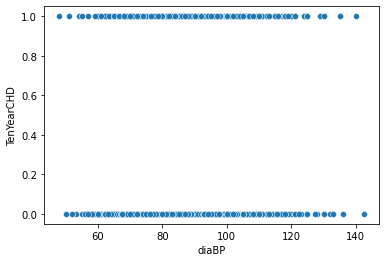

In [41]:
sns.scatterplot(data['diaBP'] , data['TenYearCHD'])

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sysBP', ylabel='TenYearCHD'>

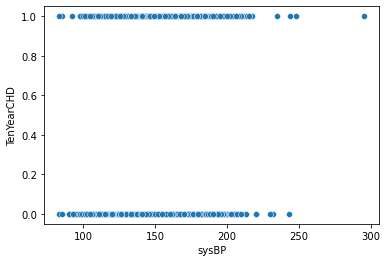

In [42]:
sns.scatterplot(data['sysBP'] , data['TenYearCHD'])

## Model building

In [43]:
df = data.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:
df['BPMeds'] = df['BPMeds'].map({0.0 : 0 , 1.0:1})

In [50]:
df.drop(columns= ['education','currentSmoker'] , axis =1 , inplace=True)

In [51]:
x = df.loc[:, df.columns != 'TenYearCHD']
y = df['TenYearCHD']

In [52]:
logreg = LogisticRegression()

In [53]:
rfe = RFE(logreg)
rfe.fit(x,y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Rumana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rumana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[ True  True False  True  True  True  True False False False False False
 False]
[1 1 2 1 1 1 1 8 5 3 6 4 7]


#### As per Recursive Feature Elimination (RFE) analysis we can exclude all the variables which are False

In [54]:
df

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,0.0,0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,43.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4236,0,44,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [56]:
x = df[['male' , 'age' , 'BPMeds' ,'prevalentStroke' , 'prevalentHyp' , 'diabetes' ]]
y = df['TenYearCHD']

In [61]:
logit= sm.Logit(y,x)
result= logit.fit()

Optimization terminated successfully.
         Current function value: 0.435066
         Iterations 6


In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4053
Model:                          Logit   Df Residuals:                     4047
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Aug 2022   Pseudo R-squ.:                -0.02197
Time:                        16:42:40   Log-Likelihood:                -1763.3
converged:                       True   LL-Null:                       -1725.4
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.1988      0.084      2.353      0.019       0.033       0.364
age                -0.0421      0.001    -29.388      0.000      -0.045      -0.039
BPMeds              0.5724      0.212      2.705      0.007       0.158       0.987
prevalentStroke     1.0290      0.434      2.371      0.018       0.178       1.880
prevalentHyp        0.8850      0.094      9.418      0.000       0.701       1.069
diabetes            1.1066      0.216      5.127      0.000       0.684       1.530
===================================================================================
"""

#### >> All variables have significant p value

In [68]:
logreg.fit(x , y)
y_pred = logreg.predict(x)

In [69]:
logreg.score(x,y)

0.8514680483592401

In [71]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3438
           1       0.74      0.03      0.06       615

    accuracy                           0.85      4053
   macro avg       0.80      0.52      0.49      4053
weighted avg       0.84      0.85      0.79      4053



In [72]:
confusion_matrix(y , y_pred)

array([[3431,    7],
       [ 595,   20]], dtype=int64)